In [76]:
import math
import pandas as pd
import numpy as np

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tqdm

In [559]:
def standarize(X):
    X_m = np.mean(X, 0)
    X_s = np.std(X, 0)
    return ((X - X_m) / X_s, X_m, X_s)


def findEigen(X_std):
    lenX = X.shape[0]
    cov_mat = X_std.T.dot(X_std)/lenX
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    return (eig_vecs, eig_vals)


def PCA(X, eig_vecs, eig_vals, dim=2):
    eig_pairs = [(abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    sum_of_unused_eigenvalues = 0
    for i in range(dim, len(eig_pairs)):
        sum_of_unused_eigenvalues+=eig_pairs[i][0]
    num_features = X.shape[1]
    proj_mat = eig_pairs[0][1].reshape(num_features,1)
    for eig_vec_idx in range(1, dim):
        proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))
    return (proj_mat, sum_of_unused_eigenvalues)

    
def projectData(X, proj_mat):
    return X.dot(proj_mat)

## Zadanie 2

In [159]:
photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X = photos["images"].T
DIM = 9
X_std = standarize(X)[0]
eig_vecs, eig_vals = findEigen(X_std)

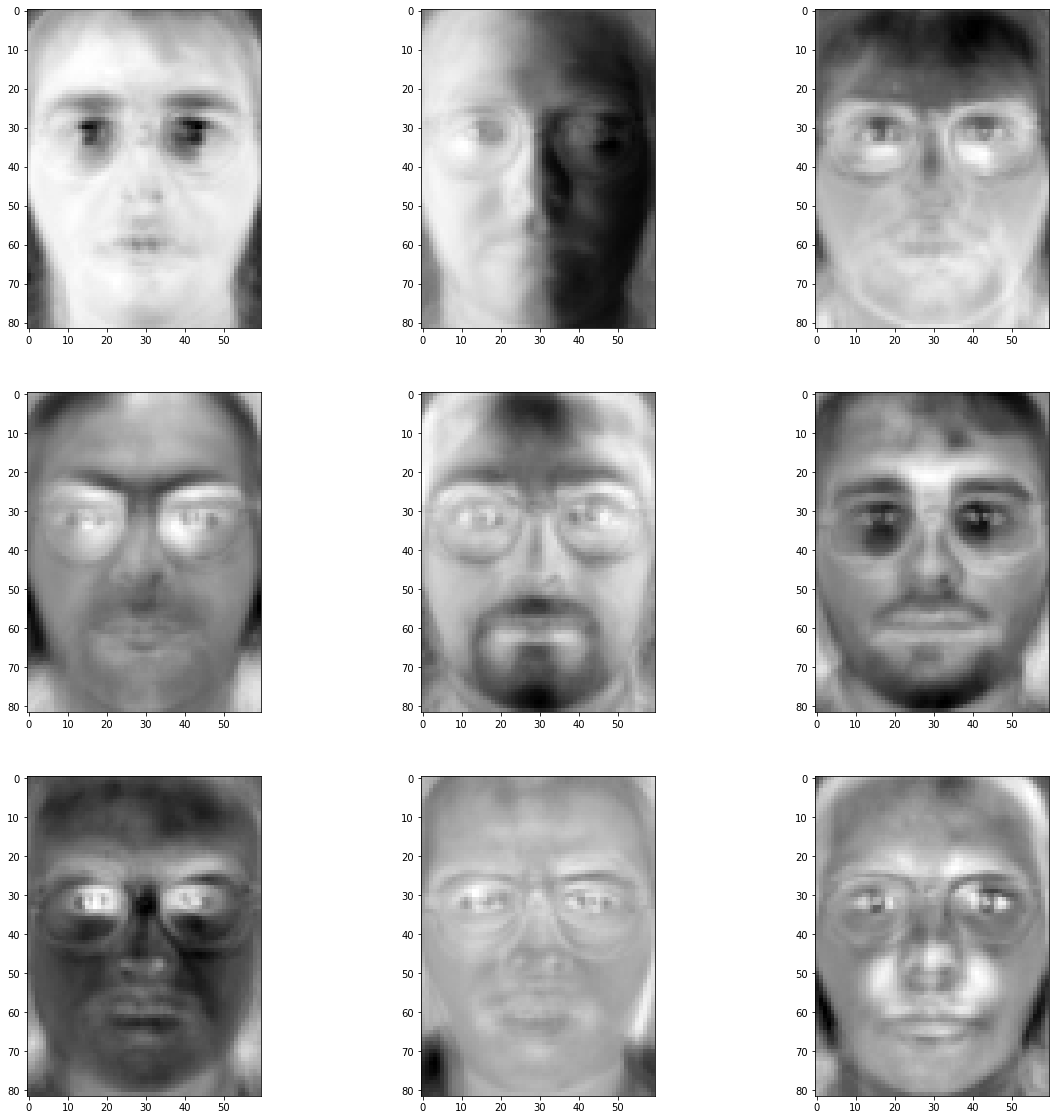

In [365]:
feature_vector = PCA(X_std, eig_vecs, eig_vals, DIM)[0]
feature_vector = feature_vector.astype(np.float64)
fig, axs = plt.subplots(3, 3, figsize=(20,20))
for i in range(0, 3):
    for j in range(0, 3):
        axs[i][j].imshow(feature_vector[:,3*i+j].reshape(60, 82).T, cmap='gray')
plt.show()

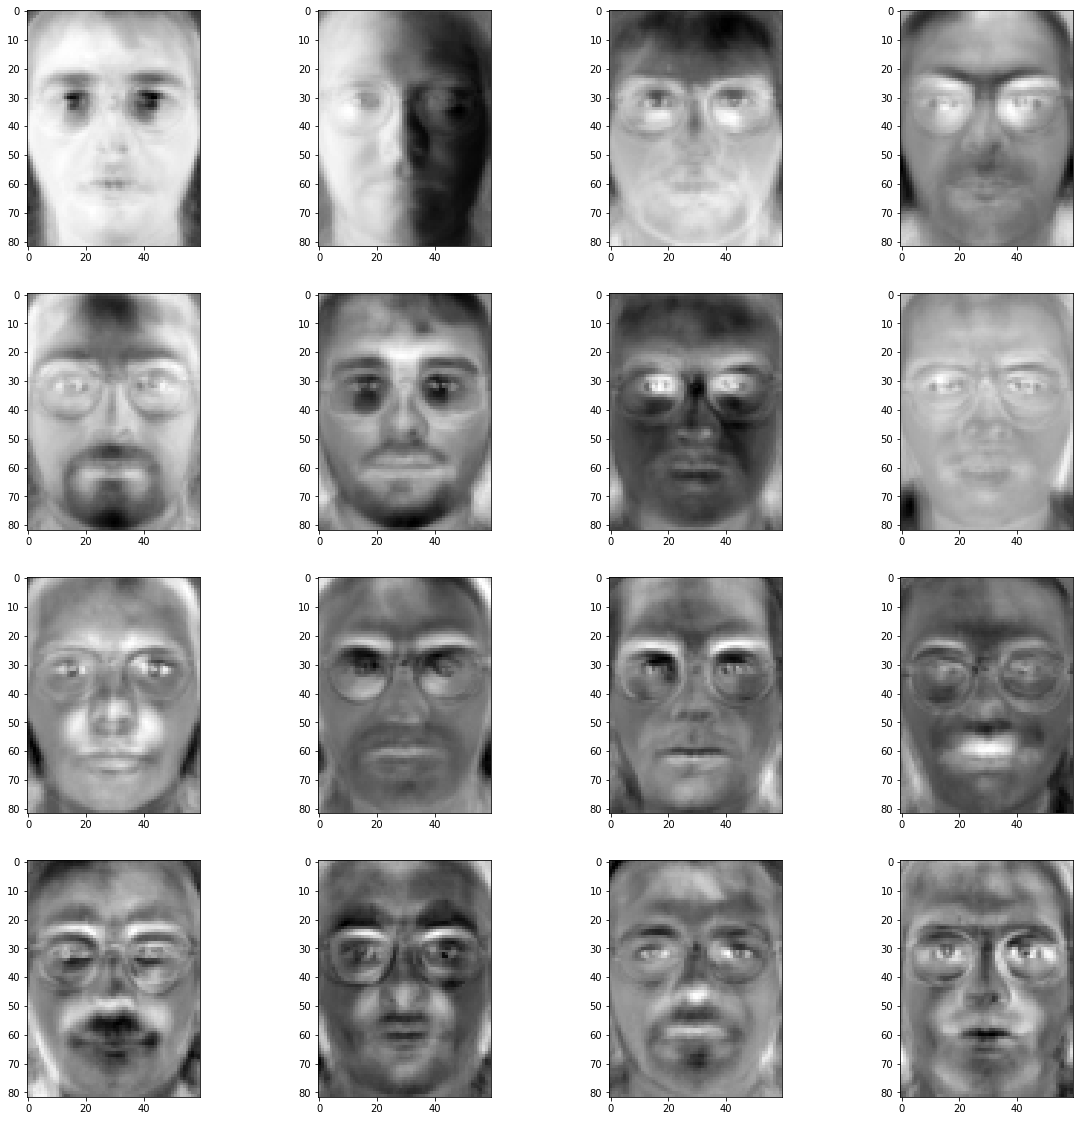

In [366]:
DIM = 16
feature_vector = PCA(X_std, eig_vecs, eig_vals, DIM)[0]
feature_vector = feature_vector.astype(np.float64)
fig, axs = plt.subplots(4, 4, figsize=(20,20))
for i in range(0, 4):
    for j in range(0, 4):
        axs[i][j].imshow(feature_vector[:,4*i+j].reshape(60, 82).T, cmap='gray')
plt.show()

In [561]:
for i in range(200, 251):
    print(f'Error: {1/2 * PCA(X_std, eig_vecs, eig_vals, i)[1]}, dim: {i}')

Error: 9.427713787868784, dim: 200
Error: 9.147044426577077, dim: 201
Error: 8.870455452017175, dim: 202
Error: 8.596194566480001, dim: 203
Error: 8.325722824817397, dim: 204
Error: 8.058137745401135, dim: 205
Error: 7.795680807154634, dim: 206
Error: 7.536949981649833, dim: 207
Error: 7.282275463785217, dim: 208
Error: 7.035894499852267, dim: 209
Error: 6.791209606965711, dim: 210
Error: 6.549115528834123, dim: 211
Error: 6.310077561931428, dim: 212
Error: 6.074624260263821, dim: 213
Error: 5.845037561469715, dim: 214
Error: 5.616327026651701, dim: 215
Error: 5.390271272094582, dim: 216
Error: 5.168186255021901, dim: 217
Error: 4.949812497849838, dim: 218
Error: 4.7388074496486725, dim: 219
Error: 4.529590745560131, dim: 220
Error: 4.32241019325539, dim: 221
Error: 4.117692731482235, dim: 222
Error: 3.916758734800326, dim: 223
Error: 3.7169929218901183, dim: 224
Error: 3.526448466098831, dim: 225
Error: 3.3379504954021595, dim: 226
Error: 3.15265496816898, dim: 227
Error: 2.9679982208

## Zadanie 3

In [565]:
def distances(X, Y):
    return np.sqrt(np.sum(((X.T-Y) ** 2), axis=1))

photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X_train = photos["images"]
def recognizeFace(trainSet, X):
    dist_mat = distances(trainSet, X)
    return np.int((np.argmin(dist_mat) // 5) + 1)

photos = scipy.io.loadmat('ReducedImagesForTesting.mat')
X_test = photos["images"]
X_train = standarize(X_train)[0]
X_test = standarize(X_test)[0]
result = np.zeros(100)
for i in tqdm.tqdm(range(0, X_test.shape[1])):
    result[i] = recognizeFace(X_train, X_test[:,i])
print(result)
result = result.astype(np.int)
accuracy = 0
for i in tqdm.tqdm(range(0, 100)):
    if result[i] == np.int(((i) // 2) + 1):
        accuracy+=1
print(accuracy/100)

100%|██████████| 100/100 [00:00<00:00, 60176.53it/s]

[ 1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7. 13.  8.  8.  9.  9.
 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17. 18. 18.
 19. 19. 20. 20. 21. 21. 22. 22. 23.  9. 24. 24. 25. 25. 26. 26. 27. 27.
 28. 28. 29. 29. 30. 30. 31. 31. 32. 32. 33. 33. 34. 34. 35. 13. 36. 36.
 13. 37. 38. 38. 39. 39. 40. 40. 41. 41. 42. 42. 43. 43. 44. 44. 45. 45.
 46. 46. 47. 47. 48. 48. 49. 49. 50. 50.]
0.96


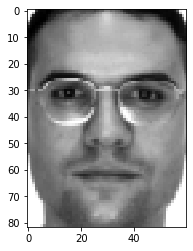

In [369]:
plt.imshow(X_train[:,157].reshape(60, 82).T, cmap='gray')

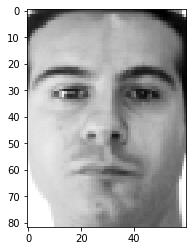

In [370]:
plt.imshow(X_test[:,0].reshape(60, 82).T, cmap='gray')

## Zadanie 4

In [371]:
photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X_train = photos["images"].T
X_train = standarize(X_train)[0]
PCA_model = decomposition.PCA(n_components=100).fit(X_train)
X_train = PCA_model.transform(X_train).T
photos = scipy.io.loadmat('ReducedImagesForTesting.mat')
X_test = photos["images"].T
X_test = standarize(X_test)[0]
X_test = PCA_model.transform(X_test).T
result = np.zeros(100)
for i in tqdm.tqdm(range(0, X_test.shape[1])):
    result[i] = recognizeFace(X_train, X_test[:,i])
print(result)
result = result.astype(np.int)
accuracy = 0
for i in tqdm.tqdm(range(0, 100)):
    if result[i] == np.int((i // 2) + 1):
        accuracy+=1
print(accuracy/100)

100%|██████████| 100/100 [00:00<00:00, 23854.31it/s]

[ 1.  7.  2.  2.  3.  7.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.  9.  9.
 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15. 16. 16. 17. 17. 18. 18.
 19. 19. 20. 20. 21. 21. 22. 22. 23. 23. 24. 24. 25. 22. 26. 26. 27. 27.
 28. 28. 29. 29. 30. 30. 14. 31. 32. 32. 33. 33. 34. 15. 35. 14. 36. 23.
 37. 37.  4. 38. 39. 39. 40. 40. 41. 41. 42. 42. 43. 43. 44. 44. 45. 45.
 46. 46. 47.  7. 48. 48. 49. 49. 50. 50.]
0.91


In [549]:
photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X_train = photos["images"].T
X_train = standarize(X_train)[0]
eig_vecs, eig_vals = findEigen(X_train)
PCA_model = PCA(X_train, eig_vecs, eig_vals, 50)
PCA_model = PCA_model.astype(np.float64)
X_train = projectData(X_train, PCA_model)
photos = scipy.io.loadmat('ReducedImagesForTesting.mat')
X_test = photos["images"].T
X_test = standarize(X_test)[0]
X_test = projectData(X_test, PCA_model)
result = np.zeros(100)
for i in tqdm.tqdm(range(0, 100)):
    result[i] = recognizeFace(X_train.T, X_test[i])
result = result.astype(np.int)
accuracy = 0
for i in tqdm.tqdm(range(0, 100)):
    if result[i] == np.int((i // 2) + 1):
        accuracy+=1
print(accuracy/100)

100%|██████████| 100/100 [00:00<00:00, 41556.56it/s]

0.89


In [373]:
photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X_train = photos["images"].T
X_train = standarize(X_train)[0]
eig_vecs, eig_vals = findEigen(X_train)
PCA_model = PCA(X_train, eig_vecs, eig_vals, 4)
PCA_model = PCA_model.astype(np.float64)
X_train = projectData(X_train, PCA_model)
photos = scipy.io.loadmat('ReducedImagesForTesting.mat')
X_test = photos["images"].T
X_test = standarize(X_test)[0]
X_test = projectData(X_test, PCA_model)
result = np.zeros(100)
for i in tqdm.tqdm(range(0, 100)):
    result[i] = recognizeFace(X_train.T, X_test[i])
result = result.astype(np.int)
accuracy = 0
for i in tqdm.tqdm(range(0, 100)):
    if result[i] == np.int((i // 2) + 1):
        accuracy+=1
print(accuracy/100)

100%|██████████| 100/100 [00:00<00:00, 44549.17it/s]

0.28


## Zadanie 5

In [543]:
def KNN(X_train, Y_train, X_test, ks):
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    dists = distance(X_train, X_test)
    
    # find closest trainig points
    closest = np.argsort(dists, axis=0)
    
    # closest trainig points - > closest trainig targets
    targets = Y_train[closest]
  
    # Alloc space for results
    preds = {}
    for k in ks:
        predictions = scipy.stats.mode(targets[:k])[0] #take k closest targets
        predictions = predictions.ravel()
        preds[k] = predictions
    return preds

photos = scipy.io.loadmat('ReducedImagesForTraining.mat')
X_train = photos["images"]
Y_train = np.arange(250)
Y_train //= 5
Y_train += 1
X_train = np.vstack((X_train, Y_train))
photos = scipy.io.loadmat('ReducedImagesForTesting.mat')
X_test = photos["images"]
Y_test = np.arange(100)
Y_test //= 2
Y_test += 1
X_test = np.vstack((X_test, Y_test))
X = np.vstack((X_train.T, X_test.T))
train, test = train_test_split(X, test_size=0.333333)
X_train = np.delete(train, 4920, 1)
Y_train = train[:,4920]
X_test = np.delete(test, 4920, 1)
Y_test = test[:,4920]

In [544]:
predictions = KNN(X_train, Y_train, X_test, np.arange(1, 10))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 53.84615384615385%
Score for k = 2 is: 41.02564102564102%
Score for k = 3 is: 36.75213675213676%
Score for k = 4 is: 34.18803418803419%
Score for k = 5 is: 32.47863247863248%
Score for k = 6 is: 29.914529914529915%
Score for k = 7 is: 23.931623931623932%
Score for k = 8 is: 23.076923076923077%
Score for k = 9 is: 18.803418803418804%


In [545]:
X_train = standarize(X_train)[0]
X_test = standarize(X_test)[0]
predictions = KNN(X_train, Y_train, X_test, np.arange(1, 10))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 54.700854700854705%
Score for k = 2 is: 41.02564102564102%
Score for k = 3 is: 40.17094017094017%
Score for k = 4 is: 31.62393162393162%
Score for k = 5 is: 32.47863247863248%
Score for k = 6 is: 27.350427350427353%
Score for k = 7 is: 26.495726495726498%
Score for k = 8 is: 20.51282051282051%
Score for k = 9 is: 17.094017094017094%


In [546]:
eig_vecs, eig_vals = findEigen(X_train) #own cell to avoid multiple calculation

In [547]:
results = []
for i in range(10, 251, 10):
    PCA_model = PCA(X_train, eig_vecs, eig_vals, i)
    PCA_model = PCA_model.astype(np.float64)
    X_train_p = projectData(X_train, PCA_model)
    X_test_p = projectData(X_test, PCA_model)
    predictions = KNN(X_train_p, Y_train, X_test_p, np.arange(1, 10))
    max_result = (0, 0)
    for k, preds in predictions.items():
        result = list(preds == Y_test)
        acc = result.count(True) / len(result) * 100
        if acc > max_result[0]:
            max_result = (acc, k, i)
    results.append(max_result)
for i in results:
    print(f'Score for k = {i[1]} and dim = {i[2]} is: {i[0]}%')

Score for k = 1 and dim = 10 is: 35.8974358974359%
Score for k = 1 and dim = 20 is: 44.44444444444444%
Score for k = 1 and dim = 30 is: 50.427350427350426%
Score for k = 1 and dim = 40 is: 53.84615384615385%
Score for k = 1 and dim = 50 is: 55.55555555555556%
Score for k = 1 and dim = 60 is: 55.55555555555556%
Score for k = 1 and dim = 70 is: 55.55555555555556%
Score for k = 1 and dim = 80 is: 54.700854700854705%
Score for k = 1 and dim = 90 is: 54.700854700854705%
Score for k = 1 and dim = 100 is: 54.700854700854705%
Score for k = 1 and dim = 110 is: 54.700854700854705%
Score for k = 1 and dim = 120 is: 54.700854700854705%
Score for k = 1 and dim = 130 is: 54.700854700854705%
Score for k = 1 and dim = 140 is: 54.700854700854705%
Score for k = 1 and dim = 150 is: 54.700854700854705%
Score for k = 1 and dim = 160 is: 54.700854700854705%
Score for k = 1 and dim = 170 is: 54.700854700854705%
Score for k = 1 and dim = 180 is: 54.700854700854705%
Score for k = 1 and dim = 190 is: 54.7008547

## Zadanie 7

In [528]:
digits = datasets.load_digits()
digits_df = np.vstack((digits.data.T, digits.target))
digits_df = digits_df.T

In [529]:
train, test = train_test_split(digits_df, test_size=0.333333)
Y_train = train[:,64]
X_train = np.delete(train, 64,axis=1)
Y_test = test[:,64]
X_test = np.delete(test, 64,axis=1)

In [530]:
predictions = KNN(X_train, Y_train, X_test, np.arange(1, 10))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 98.33055091819699%
Score for k = 2 is: 98.33055091819699%
Score for k = 3 is: 98.33055091819699%
Score for k = 4 is: 98.6644407345576%
Score for k = 5 is: 98.6644407345576%
Score for k = 6 is: 98.33055091819699%
Score for k = 7 is: 98.33055091819699%
Score for k = 8 is: 98.33055091819699%
Score for k = 9 is: 98.1636060100167%


In [531]:
PCA_model = decomposition.PCA(n_components=2).fit(X_train)
X_PCA_train = PCA_model.transform(X_train)
X_PCA_test = PCA_model.transform(X_test)
predictions = KNN(X_PCA_train, Y_train, X_PCA_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 55.75959933222037%
Score for k = 2 is: 56.093489148580964%
Score for k = 3 is: 58.764607679465776%
Score for k = 4 is: 60.26711185308849%
Score for k = 5 is: 62.10350584307178%
Score for k = 6 is: 63.77295492487479%
Score for k = 7 is: 64.9415692821369%
Score for k = 8 is: 64.77462437395658%
Score for k = 9 is: 64.60767946577629%
Score for k = 10 is: 64.77462437395658%
Score for k = 11 is: 64.44073455759599%
Score for k = 12 is: 65.7762938230384%
Score for k = 13 is: 64.9415692821369%
Score for k = 14 is: 64.44073455759599%
Score for k = 15 is: 64.44073455759599%
Score for k = 16 is: 65.4424040066778%
Score for k = 17 is: 64.44073455759599%
Score for k = 18 is: 63.77295492487479%
Score for k = 19 is: 64.77462437395658%
Score for k = 20 is: 64.27378964941569%
Score for k = 21 is: 63.43906510851419%
Score for k = 22 is: 63.77295492487479%
Score for k = 23 is: 64.10684474123539%
Score for k = 24 is: 65.1085141903172%
Score for k = 25 is: 63.60601001669449%
Score for k 

In [532]:
KPCA_model = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit(X_train)
X_KPCA_train = KPCA_model.transform(X_train)
X_KPCA_test = KPCA_model.transform(X_test)
predictions = KNN(X_KPCA_train, Y_train, X_KPCA_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 11.519198664440735%
Score for k = 2 is: 9.348914858096828%
Score for k = 3 is: 9.348914858096828%
Score for k = 4 is: 9.348914858096828%
Score for k = 5 is: 9.348914858096828%
Score for k = 6 is: 9.348914858096828%
Score for k = 7 is: 11.519198664440735%
Score for k = 8 is: 11.519198664440735%
Score for k = 9 is: 9.348914858096828%
Score for k = 10 is: 9.348914858096828%
Score for k = 11 is: 9.348914858096828%
Score for k = 12 is: 9.348914858096828%
Score for k = 13 is: 10.684474123539232%
Score for k = 14 is: 10.684474123539232%
Score for k = 15 is: 10.684474123539232%
Score for k = 16 is: 9.84974958263773%
Score for k = 17 is: 9.84974958263773%
Score for k = 18 is: 9.348914858096828%
Score for k = 19 is: 9.348914858096828%
Score for k = 20 is: 9.348914858096828%
Score for k = 21 is: 9.348914858096828%
Score for k = 22 is: 9.348914858096828%
Score for k = 23 is: 9.348914858096828%
Score for k = 24 is: 9.348914858096828%
Score for k = 25 is: 9.348914858096828%
Score

In [533]:
ISO_model = manifold.Isomap(30, n_components=2).fit(X_train)
X_ISO_train = ISO_model.transform(X_train)
X_ISO_test = ISO_model.transform(X_test)
predictions = KNN(X_ISO_train, Y_train, X_ISO_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 68.28046744574291%
Score for k = 2 is: 67.9465776293823%
Score for k = 3 is: 71.95325542570951%
Score for k = 4 is: 72.78797996661102%
Score for k = 5 is: 73.45575959933221%
Score for k = 6 is: 75.45909849749583%
Score for k = 7 is: 76.29382303839732%
Score for k = 8 is: 75.45909849749583%
Score for k = 9 is: 76.62771285475793%
Score for k = 10 is: 77.12854757929884%
Score for k = 11 is: 77.29549248747914%
Score for k = 12 is: 77.12854757929884%
Score for k = 13 is: 78.13021702838063%
Score for k = 14 is: 77.79632721202003%
Score for k = 15 is: 78.13021702838063%
Score for k = 16 is: 78.13021702838063%
Score for k = 17 is: 78.46410684474124%
Score for k = 18 is: 78.29716193656094%
Score for k = 19 is: 78.13021702838063%
Score for k = 20 is: 77.29549248747914%
Score for k = 21 is: 77.79632721202003%
Score for k = 22 is: 77.79632721202003%
Score for k = 23 is: 78.13021702838063%
Score for k = 24 is: 77.79632721202003%
Score for k = 25 is: 78.63105175292154%
Score for 

In [534]:
LLE_model = manifold.LocallyLinearEmbedding(30, n_components=2).fit(X_train)
X_LLE_train = LLE_model.transform(X_train)
X_LLE_test = LLE_model.transform(X_test)
predictions = KNN(X_LLE_train, Y_train, X_LLE_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 48.74791318864774%
Score for k = 2 is: 49.248747913188645%
Score for k = 3 is: 51.08514190317195%
Score for k = 4 is: 51.75292153589316%
Score for k = 5 is: 52.75459098497496%
Score for k = 6 is: 52.25375626043406%
Score for k = 7 is: 52.75459098497496%
Score for k = 8 is: 52.92153589315526%
Score for k = 9 is: 53.255425709515855%
Score for k = 10 is: 54.257095158597664%
Score for k = 11 is: 54.59098497495827%
Score for k = 12 is: 54.59098497495827%
Score for k = 13 is: 53.923205342237054%
Score for k = 14 is: 54.257095158597664%
Score for k = 15 is: 53.756260434056756%
Score for k = 16 is: 54.09015025041736%
Score for k = 17 is: 53.42237061769616%
Score for k = 18 is: 52.08681135225376%
Score for k = 19 is: 52.587646076794655%
Score for k = 20 is: 52.25375626043406%
Score for k = 21 is: 53.08848080133556%
Score for k = 22 is: 53.08848080133556%
Score for k = 23 is: 53.255425709515855%
Score for k = 24 is: 53.58931552587646%
Score for k = 25 is: 52.92153589315526%
S

In [540]:
digits = datasets.load_digits()
digits.data = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(digits.data)
digits_df = np.vstack((digits.data.T, digits.target))
digits_df = digits_df.T
train, test = train_test_split(digits_df, test_size=0.333333)
Y_train = train[:,2]
X_train = np.delete(train, 2,axis=1)
Y_test = test[:,2]
X_test = np.delete(test, 2,axis=1)
predictions = KNN(X_train, Y_train, X_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 57.42904841402338%
Score for k = 2 is: 57.095158597662774%
Score for k = 3 is: 62.77128547579299%
Score for k = 4 is: 62.77128547579299%
Score for k = 5 is: 65.9432387312187%
Score for k = 6 is: 65.1085141903172%
Score for k = 7 is: 66.7779632721202%
Score for k = 8 is: 66.6110183639399%
Score for k = 9 is: 66.6110183639399%
Score for k = 10 is: 66.4440734557596%
Score for k = 11 is: 67.4457429048414%
Score for k = 12 is: 67.2787979966611%
Score for k = 13 is: 66.6110183639399%
Score for k = 14 is: 67.6126878130217%
Score for k = 15 is: 67.779632721202%
Score for k = 16 is: 68.11352253756262%
Score for k = 17 is: 67.9465776293823%
Score for k = 18 is: 67.9465776293823%
Score for k = 19 is: 67.779632721202%
Score for k = 20 is: 67.1118530884808%
Score for k = 21 is: 67.6126878130217%
Score for k = 22 is: 67.9465776293823%
Score for k = 23 is: 67.9465776293823%
Score for k = 24 is: 67.779632721202%
Score for k = 25 is: 67.779632721202%
Score for k = 26 is: 68.28046744

In [541]:
digits = datasets.load_digits()
digits.data = manifold.TSNE(n_components=2, init='pca').fit_transform(digits.data)
digits_df = np.vstack((digits.data.T, digits.target))
digits_df = digits_df.T
train, test = train_test_split(digits_df, test_size=0.333333)
Y_train = train[:,2]
X_train = np.delete(train, 2,axis=1)
Y_test = test[:,2]
X_test = np.delete(test, 2,axis=1)
predictions = KNN(X_train, Y_train, X_test, np.arange(1, 30))
for k, preds in predictions.items():
    result = list(preds == Y_test)
    print(f'Score for k = {k} is: {result.count(True) / len(result) * 100}%')

Score for k = 1 is: 98.49749582637729%
Score for k = 2 is: 98.49749582637729%
Score for k = 3 is: 98.8313856427379%
Score for k = 4 is: 98.8313856427379%
Score for k = 5 is: 98.8313856427379%
Score for k = 6 is: 98.8313856427379%
Score for k = 7 is: 98.8313856427379%
Score for k = 8 is: 98.8313856427379%
Score for k = 9 is: 98.8313856427379%
Score for k = 10 is: 98.8313856427379%
Score for k = 11 is: 98.8313856427379%
Score for k = 12 is: 98.33055091819699%
Score for k = 13 is: 98.33055091819699%
Score for k = 14 is: 98.33055091819699%
Score for k = 15 is: 97.66277128547578%
Score for k = 16 is: 97.66277128547578%
Score for k = 17 is: 97.66277128547578%
Score for k = 18 is: 97.66277128547578%
Score for k = 19 is: 97.66277128547578%
Score for k = 20 is: 97.66277128547578%
Score for k = 21 is: 97.66277128547578%
Score for k = 22 is: 97.66277128547578%
Score for k = 23 is: 97.49582637729549%
Score for k = 24 is: 97.49582637729549%
Score for k = 25 is: 97.49582637729549%
Score for k = 26 i